# **Project 3: Design, Data Collection, and Neural Network-Based Classification (Supervised Machine Learning) of Human Postures Using IMU Signals**
 **Author: Anushka Satav**  
 **Course: BMI/CEN 598 — Embedded Machine Learning**  
 **Device: Arduino Nano 33 BLE Sense Rev2**  

In [1]:
# 1. Setup & Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization

from tensorflow.keras.utils import to_categorical

In [2]:
# 2. Upload Dataset
from google.colab import files
uploaded = files.upload()

# final_dataset.csv
# unscaled_final_dataset.csv

Saving final_dataset.csv to final_dataset.csv
Saving unscaled_final_dataset.csv to unscaled_final_dataset.csv


In [3]:
# 3. Load Dataset (Scaled)

df = pd.read_csv("final_dataset.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3690, 4)


,X,Y,Z,label
0,0.58347,2.03805,0.46378,3
1,0.60262,2.02861,0.47133,3
2,0.55942,2.02211,0.45066,3
3,0.54107,2.01731,0.42971,3
4,0.54924,2.03340,0.41221,3


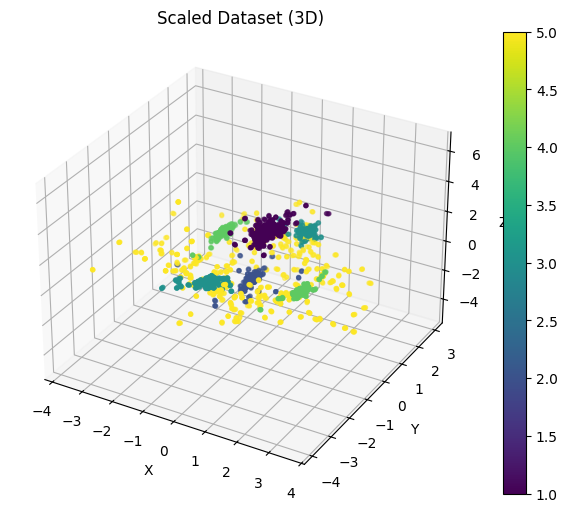

In [4]:
# 4. Visualize Scaled Dataset (3D Plot)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df["X"], df["Y"], df["Z"],
                     c=df["label"], cmap="viridis", s=8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Scaled Dataset (3D)")
plt.colorbar(scatter)
plt.show()

In [5]:
# 5. Train / Validation / Test Split

X = df[["X","Y","Z"]].values
y = df["label"].values

# Convert labels to one-hot
y_cat = to_categorical(y - 1, num_classes=5)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat,
                                                    test_size=0.30,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.50,
                                                random_state=42)

print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)


Train: (2583, 3)
Val:   (553, 3)
Test:  (554, 3)


In [7]:
# 6. Function to Build Model With Custom Activation


def build_model_with_activation(act):
    inputs = Input(shape=(X_train.shape[1],))   # 3 input features

    # Hidden layers with variable activation
    x = Dense(64, activation=act)(inputs)
    x = Dense(32, activation=act)(x)
    x = Dense(16, activation=act)(x)

    # Output layer: 5 classes
    outputs = Dense(5, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



In [8]:
#  7. Train Models with 3 Activation Functions

activations = ["sigmoid", "tanh", "relu"]
histories = {}
results = {}
trained_models = {}  # to save the different models which use different activation functions

for act in activations:
    print(f"\n Training model with activation: {act} ...\n")

    model = build_model_with_activation(act)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=1
    )

    histories[act] = history
    trained_models[act] = model

    # save the trained models for all activation functions
    for act, model in trained_models.items():
      model.save(f"{act}_model.h5")

    # Evaluate on test data
    y_pred = model.predict(X_test)
    acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    results[act] = acc
    print(f"Test Accuracy ({act}):", acc)



 Training model with activation: sigmoid ...

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.1841 - loss: 1.6733 - val_accuracy: 0.3671 - val_loss: 1.6015
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2962 - loss: 1.5947 - val_accuracy: 0.1971 - val_loss: 1.5671
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3931 - loss: 1.5396 - val_accuracy: 0.5298 - val_loss: 1.4393
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5184 - loss: 1.3880 - val_accuracy: 0.5407 - val_loss: 1.2444
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5986 - loss: 1.1969 - val_accuracy: 0.7071 - val_loss: 1.0715
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 1.0406 - val_accuracy: 0.7052 - val_loss: 0.9392
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.9322 - val_accuracy: 0.6998 - val_loss: 0.8522
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Test Accuracy (sigmoid): 0.9657039711191335

 Training model with activation: tanh ...

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5064 - loss: 1.2596 - val_accuracy: 0.6329 - val_loss: 0.9314
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.8769 - val_accuracy: 0.8373 - val_loss: 0.6490
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.6189 - val_accuracy: 0.8807 - val_loss: 0.4892
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8828 - loss: 0.5020 - val_accuracy: 0.8987 - val_loss: 0.4020
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.3938 - val_accuracy: 0.9186 - val_loss: 0.3444
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.3500 - val_accuracy: 0.9259 - val_loss: 0.3021
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9288 - loss: 0.2968 - val_accuracy: 0.9313 -

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Accuracy (tanh): 0.9765342960288809

 Training model with activation: relu ...

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5173 - loss: 1.4616 - val_accuracy: 0.8282 - val_loss: 0.8076
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.6046 - val_accuracy: 0.9313 - val_loss: 0.3016
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9278 - loss: 0.2708 - val_accuracy: 0.9476 - val_loss: 0.2135
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9370 - loss: 0.2173 - val_accuracy: 0.9530 - val_loss: 0.1748
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9423 - loss: 0.2028 - val_accuracy: 0.9476 - val_loss: 0.1660
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9405 - loss: 0.1945 - val_accuracy: 0.9367 - val_loss: 0.1765
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.1675 - val_accuracy: 0.9566 - va

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Accuracy (relu): 0.98014440433213


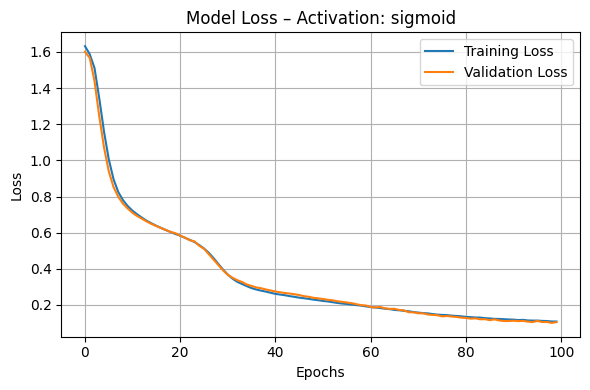

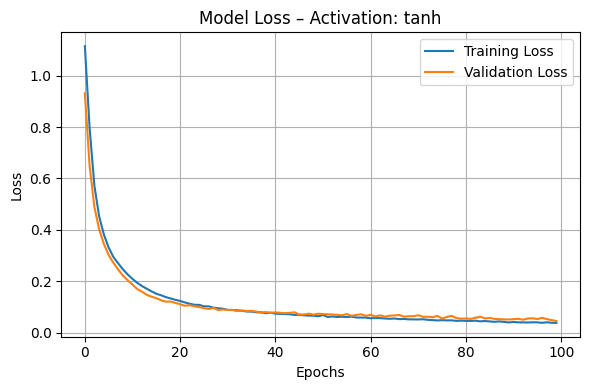

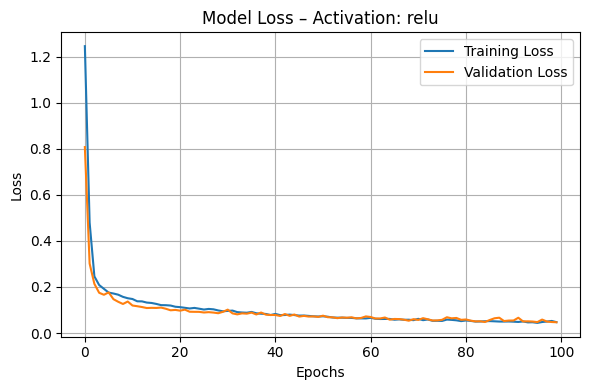

In [9]:
import matplotlib.pyplot as plt

for act in activations:    # ["sigmoid", "tanh", "relu"]
    history = histories[act]

    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss – Activation: {act}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



=== FINAL TEST ACCURACY COMPARISON ===
SIGMOID  : 0.9657
TANH     : 0.9765
RELU     : 0.9801


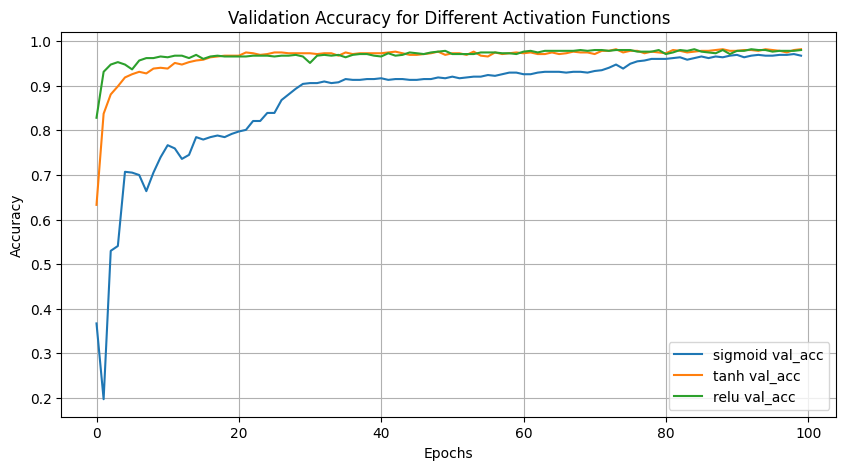

In [10]:
print("\n=== FINAL TEST ACCURACY COMPARISON ===")
for act, acc in results.items():
    print(f"{act.upper():8s} : {acc:.4f}")



plt.figure(figsize=(10,5))
for act in activations:
    plt.plot(histories[act].history['val_accuracy'], label=f"{act} val_acc")
plt.legend()
plt.title("Validation Accuracy for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


##Evaluation of the Trained Model

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

def evaluate_model(model, X_test, y_test):
    """
    Evaluates trained model on test dataset and prints:
    - Test accuracy
    - Classification report
    - Confusion matrix
    """
    # Predictions (softmax probabilities)
    y_pred_prob = model.predict(X_test)

    # Convert one-hot to class index [0–4]
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Accuracy
    test_accuracy = accuracy_score(y_true, y_pred)
    print(f"\n*Test Accuracy*: {test_accuracy:.4f}\n")

    # Classification report
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=[
        "Supine", "Prone", "Side", "Sitting", "Unknown"
    ]))

    # Confusion matrix
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_true, y_pred))

    return test_accuracy, y_true, y_pred


In [12]:
print("Evaluating TANH model...")
evaluate_model(trained_models["tanh"], X_test, y_test)

print("\nEvaluating RELU model...")
evaluate_model(trained_models["relu"], X_test, y_test)

print("\nEvaluating SIGMOID model...")
evaluate_model(trained_models["sigmoid"], X_test, y_test)


Evaluating TANH model...
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

*Test Accuracy*: 0.9765

=== Classification Report ===
              precision    recall  f1-score   support

      Supine       1.00      1.00      1.00       123
       Prone       0.97      1.00      0.99       116
        Side       0.95      0.99      0.97       123
     Sitting       0.98      1.00      0.99        96
     Unknown       0.99      0.88      0.93        96

    accuracy                           0.98       554
   macro avg       0.98      0.97      0.97       554
weighted avg       0.98      0.98      0.98       554

=== Confusion Matrix ===
[[123   0   0   0   0]
 [  0 116   0   0   0]
 [  0   0 122   0   1]
 [  0   0   0  96   0]
 [  0   3   7   2  84]]

Evaluating RELU model...
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

*Test Accuracy*: 0.9801

=== Classification Report ===
              precision    recall  f1-score   support

      Supine       1.00      1.00      1.00       123
       Prone      

(0.9657039711191335,
 array([2, 2, 3, 1, 3, 2, 0, 2, 3, 1, 0, 2, 0, 4, 2, 0, 0, 1, 1, 2, 2, 0,
        1, 4, 2, 0, 1, 2, 3, 4, 4, 4, 2, 0, 1, 1, 3, 2, 2, 4, 4, 2, 2, 1,
        4, 3, 2, 0, 4, 4, 2, 2, 3, 1, 4, 4, 4, 4, 3, 0, 3, 0, 2, 0, 4, 3,
        2, 1, 4, 2, 2, 1, 2, 3, 1, 1, 1, 4, 0, 1, 3, 3, 4, 1, 1, 0, 0, 0,
        1, 2, 0, 0, 3, 2, 0, 0, 1, 3, 4, 2, 2, 4, 4, 2, 4, 3, 0, 2, 4, 0,
        1, 3, 3, 3, 1, 1, 4, 0, 1, 4, 4, 2, 4, 1, 4, 3, 1, 2, 3, 4, 4, 3,
        2, 0, 2, 0, 0, 1, 4, 1, 0, 3, 1, 0, 2, 2, 2, 0, 2, 0, 0, 3, 3, 0,
        0, 2, 1, 0, 2, 1, 1, 4, 4, 2, 0, 4, 1, 3, 2, 1, 1, 4, 2, 1, 3, 1,
        3, 2, 2, 0, 2, 1, 3, 4, 4, 0, 1, 3, 3, 1, 0, 1, 4, 4, 3, 4, 2, 2,
        0, 2, 3, 0, 3, 4, 1, 3, 0, 3, 3, 2, 2, 3, 3, 4, 2, 2, 4, 3, 3, 0,
        0, 1, 0, 0, 3, 0, 4, 1, 1, 1, 2, 2, 2, 0, 3, 1, 1, 3, 0, 1, 4, 4,
        4, 0, 2, 3, 0, 2, 4, 1, 1, 1, 2, 3, 0, 3, 2, 1, 0, 0, 1, 0, 3, 0,
        1, 2, 0, 3, 1, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 2, 1, 1,
        3, 0, 2, 

In [13]:
# Create a DataFrame for display
acc_table = pd.DataFrame({
    "Activation Function": ["Sigmoid", "Tanh", "ReLU"],
    "Test Accuracy": [
        results["sigmoid"],
        results["tanh"],
        results["relu"]
    ]
})

# Round accuracy
acc_table["Test Accuracy"] = acc_table["Test Accuracy"].round(4)

print("\n=== FINAL TEST ACCURACY COMPARISON TABLE ===")
display(acc_table)



=== FINAL TEST ACCURACY COMPARISON TABLE ===


,Activation Function,Test Accuracy
0,Sigmoid,0.9657
1,Tanh,0.9765
2,ReLU,0.9801


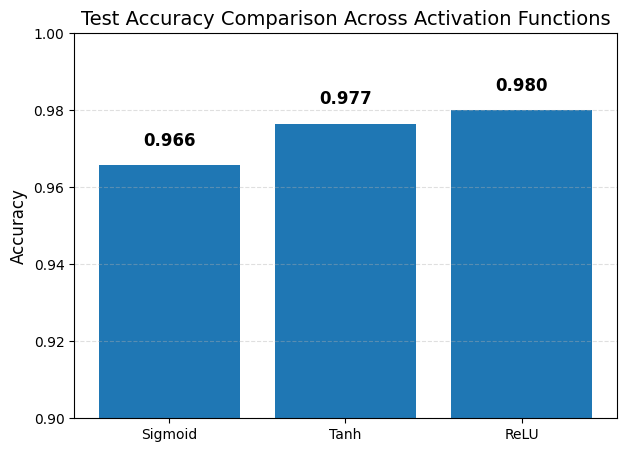

In [14]:
acts = ["Sigmoid", "Tanh", "ReLU"]
accs = [
    results["sigmoid"],
    results["tanh"],
    results["relu"]
]

plt.figure(figsize=(7,5))
bars = plt.bar(acts, accs)

# Annotate bars with accuracy values
for bar, acc in zip(bars, accs):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.005,
        f"{acc:.3f}",
        ha="center",
        fontsize=12,
        fontweight='bold'
    )

plt.title("Test Accuracy Comparison Across Activation Functions", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.90, 1.00)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


In [15]:
best_act = acc_table.iloc[acc_table["Test Accuracy"].idxmax()]
print(f"\nThe best activation function is: {best_act['Activation Function']} with a test accuracy of {best_act['Test Accuracy']:.4f}.\n")

print("Summary:")
print(f"- Sigmoid accuracy:  {results['sigmoid']:.4f}")
print(f"- Tanh accuracy:     {results['tanh']:.4f}")
print(f"- ReLU accuracy:     {results['relu']:.4f}")



The best activation function is: ReLU with a test accuracy of 0.9801.

Summary:
- Sigmoid accuracy:  0.9657
- Tanh accuracy:     0.9765
- ReLU accuracy:     0.9801
